In [2]:
%load_ext autoreload

Files already downloaded and verified


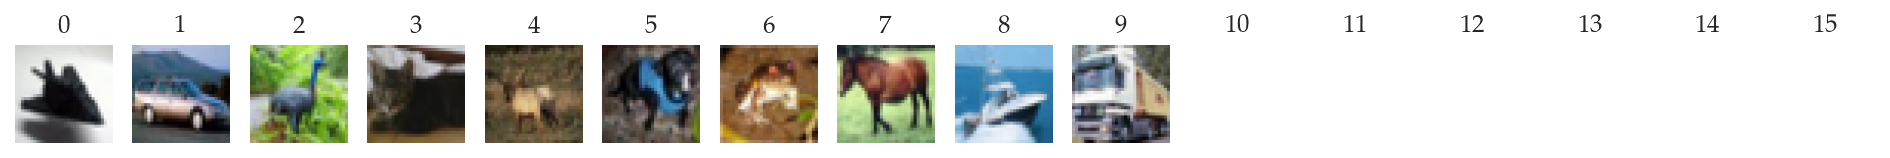

In [140]:
import sys
sys.path.append('..')

from position_datasets import CIFAR10Position
from position_datasets import CIFAR10Shortcut
from torchvision.datasets import CIFAR10

import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

scale = -1
pos_classes = 10
pos_per_class = 4
shuffle_classes = True


dataset = CIFAR10('../data', train=True, download=True)
n_classes = 10
fig_name = 'c10'

# pos_settings = CIFAR10Position.set_pos_classes(scale=scale,
#                                                pos_classes=pos_classes,
#                                                pos_per_class=pos_per_class,
#                                                shuffle_classes=shuffle_classes)
# dataset = CIFAR10Position('../data', *pos_settings, train=True, download=True, scale=scale)
# n_classes = dataset.nr_classes
# fig_name = 'c10_pos'

# pos_settings = CIFAR10Shortcut.set_pos_classes(cut_classes=4,
#                                                 shuffle_classes=False)
# dataset = CIFAR10Shortcut('../data', *pos_settings, train=True, download=True)
# n_classes = dataset.nr_classes
# fig_name = 'c10_cut'

# Row: dataset once for C10, twice for C10Pos and C10Cut
# Column: all classes

# print(dataset.c10_class_is_pos_class)

fig, axs = plt.subplots(1, 16, figsize=(16, 1), dpi=150)
[ax.axis('off') for ax in axs]
[ax.set_title(f"{i}") for (i, ax) in enumerate(axs)]
i = 0
stop = [False for _ in range(n_classes)]
for sample in dataset:
    img = sample[0]
    target = sample[1]

    if stop[target]:
        continue

    img = torch.tensor(np.array(img)).permute(2, 0, 1).float() / 255
    ax = axs[target]
    img = torch.nn.functional.interpolate(img.unsqueeze(0), scale_factor=4.).squeeze(0).permute(1, 2, 0)
    ax.imshow(img)
    ax.set_title(f"{target}")
    ax.axis('off')

    stop[target] = True
    if all(stop):
        break

for i in range(10, 16):
    ax = axs[i]
    ax.imshow(np.ones_like(img))

plt.savefig(f'{fig_name}.pdf', bbox_inches='tight')
plt.savefig(f'{fig_name}.jpg', bbox_inches='tight')
plt.show()

Files already downloaded and verified
CIFAR10Position({0: [0, 1, 2, 3], 1: [4, 5, 6, 7], 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, 7: 13, 8: 14, 9: 15}, {0: tensor([0, 1, 2, 3]), 1: tensor([0, 1, 2, 3]), 2: tensor([0, 1, 2, 3]), 3: tensor([0, 1, 2, 3]), 4: tensor([0, 1, 2, 3]), 5: tensor([0, 1, 2, 3]), 6: tensor([0, 1, 2, 3]), 7: tensor([0, 1, 2, 3]), 8: tensor([0, 1, 2, 3]), 9: tensor([0, 1, 2, 3])}


/home/robert-jan/surfdrive/experiments/vit-position-info/datasets/position_datasets.py:119: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  row = position // blocks_per_row


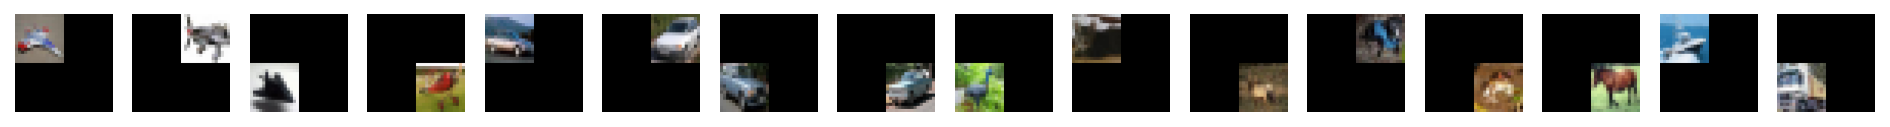

In [3]:
%autoreload
import sys
sys.path.append('..')

from position_datasets import CIFAR10Position
from position_datasets import CIFAR10Shortcut
from torchvision.datasets import CIFAR10

import matplotlib.pyplot as plt
import numpy as np
import torch

scale = -1
pos_classes = 2
pos_per_class = 4
shuffle_classes = False

# dataset = CIFAR10('../data', train=True, download=True)
# n_classes = 10
# fig_name = 'c10'

pos_settings = CIFAR10Position.set_pos_classes(scale=scale,
                                               pos_classes=pos_classes,
                                               pos_per_class=pos_per_class,
                                               shuffle_classes=shuffle_classes,
                                               shuffle_positions=False)
dataset = CIFAR10Position('../data', *pos_settings, train=True, download=True, scale=scale)
n_classes = dataset.nr_classes
fig_name = 'c10_pos'

# pos_settings = CIFAR10Shortcut.set_pos_classes(cut_classes=4,
#                                                 shuffle_classes=False)
# dataset = CIFAR10Shortcut('../data', *pos_settings, train=True, download=True)
# n_classes = dataset.nr_classes
# fig_name = 'c10_cut'

# Row: dataset once for C10, twice for C10Pos and C10Cut
# Column: all classes

# print(dataset.c10_class_is_pos_class)

fig, axs = plt.subplots(1, n_classes, figsize=(16, 1.7), dpi=150)
i = 0
stop = [0 for _ in range(n_classes)]
for sample in dataset:
    img = sample[0]
    target = sample[1]

    if stop[target] == 1:
        continue

    img = torch.tensor(np.array(img)).permute(2, 0, 1).float() / 255
    # ax = axs[stop[target],target]
    ax = axs[target]
    img = torch.nn.functional.interpolate(img.unsqueeze(0), scale_factor=4.).squeeze(0).permute(1, 2, 0)
    ax.imshow(img)
    # if stop[target] == 0:
    #     ax.set_title(f"{target}" + (" (pos)" if target < 8 else ""))
    ax.axis('off')

    stop[target] += 1
    if sum(stop) == 1 * n_classes:
        break

plt.savefig(f'{fig_name}.pdf', bbox_inches='tight')
plt.savefig(f'{fig_name}.jpg', bbox_inches='tight')
plt.show()

Files already downloaded and verified
CIFAR10Shortcut({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, ColoredSquareShortcut(color=tensor([1., 0., 0.]), size=3, position=(4, 4), pos_noise=1, noise=0.05),ColoredSquareShortcut(color=tensor([0., 1., 0.]), size=3, position=(28, 4), pos_noise=1, noise=0.05),ColoredSquareShortcut(color=tensor([0., 0., 1.]), size=3, position=(4, 28), pos_noise=1, noise=0.05),ColoredSquareShortcut(color=tensor([1., 1., 0.]), size=3, position=(28, 28), pos_noise=1, noise=0.05),None,None,None,None,None,None


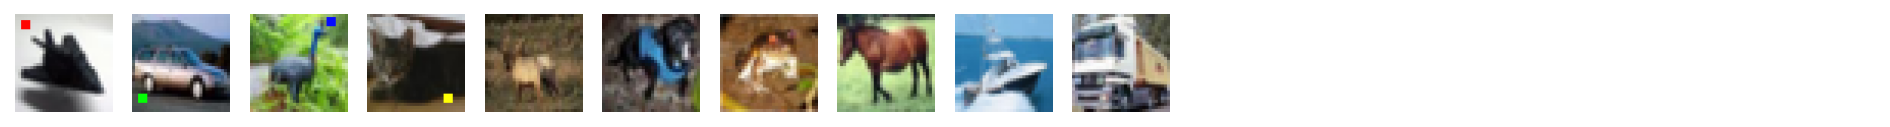

In [6]:
%autoreload
import sys
sys.path.append('..')

from position_datasets import CIFAR10Position
from position_datasets import CIFAR10Shortcut
from torchvision.datasets import CIFAR10

import matplotlib.pyplot as plt
import numpy as np
import torch

scale = -1
pos_classes = 2
pos_per_class = 4


# dataset = CIFAR10('../data', train=True, download=True)
# n_classes = 10
# fig_name = 'c10'

# pos_settings = CIFAR10Position.set_pos_classes(scale=scale,
#                                                pos_classes=pos_classes,
#                                                pos_per_class=pos_per_class,
#                                                shuffle_classes=shuffle_classes)
# dataset = CIFAR10Position('../data', *pos_settings, train=True, download=True, scale=scale)
# n_classes = dataset.nr_classes
# fig_name = 'c10_pos'

pos_settings = CIFAR10Shortcut.set_pos_classes(cut_classes=4,
                                                shuffle_classes=False,
                                                shuffle_shortcuts=False)
dataset = CIFAR10Shortcut('../data', *pos_settings, train=True, download=True)
n_classes = dataset.nr_classes
fig_name = 'c10_cut'

# Row: dataset once for C10, twice for C10Pos and C10Cut
# Column: all classes

# print(dataset.c10_class_is_pos_class)

fig, axs = plt.subplots(1, 16, figsize=(16, 1), dpi=150)
i = 0
[ax.axis('off') for ax in axs]
# [ax.axis('off') for ax in axs[1]]
stop = [0 for _ in range(n_classes)]
for sample in dataset:
    img = sample[0]
    target = sample[1]

    if stop[target] == 1:
        continue

    img = torch.tensor(np.array(img)).permute(2, 0, 1).float() / 255
    # ax = axs[stop[target],target]
    ax = axs[target]
    img = torch.nn.functional.interpolate(img.unsqueeze(0), scale_factor=4.).squeeze(0).permute(1, 2, 0)
    ax.imshow(img)
    # if stop[target] == 0:
    #     # ax.set_title(f"{target}" + (" (cut)" if target < 4 else ""))
    #     ax.set_title(f"{target}")
    ax.axis('off')

    stop[target] += 1
    if sum(stop) == 1 * n_classes:
        break

for i in range(10, 16):
    axs[i].imshow(torch.ones_like(img))

plt.savefig(f'{fig_name}.pdf', bbox_inches='tight')
plt.savefig(f'{fig_name}.jpg', bbox_inches='tight')
plt.show()

{0: <position_datasets.ColoredSquareShortcut object at 0x7f3611284040>, 1: <position_datasets.ColoredSquareShortcut object at 0x7f3611284190>, 2: <position_datasets.ColoredSquareShortcut object at 0x7f36112841f0>, 3: <position_datasets.ColoredSquareShortcut object at 0x7f3611284250>, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None}


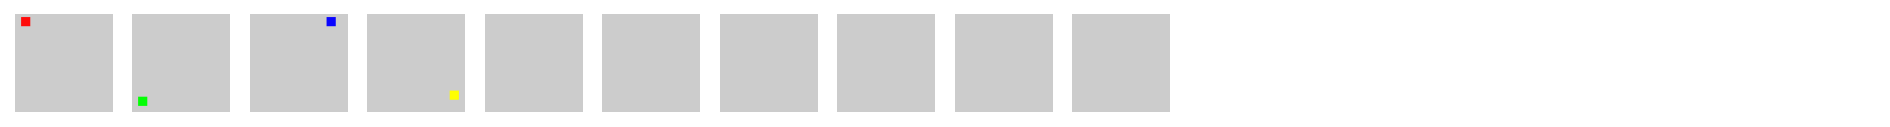

In [7]:
# Only shortcuts
fig_name = 'c10_cut_func'

fig, axs = plt.subplots(1, 16, figsize=(16, 1), dpi=150)
[ax.axis('off') for ax in axs]

for t in range(0, 10):
    # From Pillow to Torch
    img = torch.ones((3, 32, 32), dtype=torch.float32) * 0.8

    # (C, H, W)
    if t in dataset.c10_class_to_positions:
        shortcut = dataset.c10_class_to_positions[t]
        if shortcut is not None:
            img = shortcut.draw(img)

    img = torch.nn.functional.interpolate(img.unsqueeze(0), scale_factor=4.).squeeze(0).permute(1, 2, 0)

    axs[t].imshow(img)

for i in range(10, 16):
    axs[i].imshow(torch.ones_like(img))

print(dataset.c10_class_to_positions)

plt.savefig(f'{fig_name}.pdf', bbox_inches='tight')
plt.savefig(f'{fig_name}.jpg', bbox_inches='tight')
plt.show()

{0: <position_datasets.ColoredSquareShortcut object at 0x7f3611284040>, 1: <position_datasets.ColoredSquareShortcut object at 0x7f3611284190>, 2: <position_datasets.ColoredSquareShortcut object at 0x7f36112841f0>, 3: <position_datasets.ColoredSquareShortcut object at 0x7f3611284250>, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None}


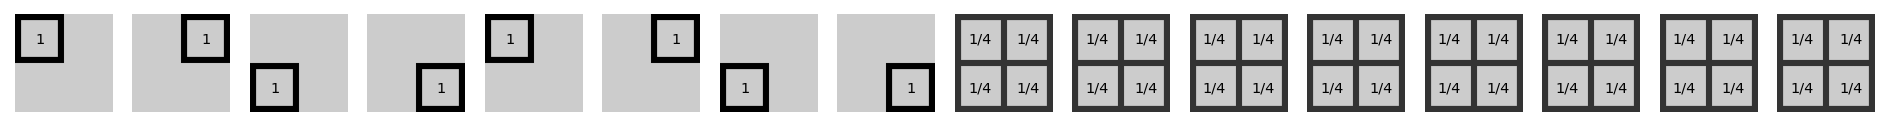

In [9]:
# Only position patches
fig_name = 'c10_pos_func'

fig, axs = plt.subplots(1, 16, figsize=(16, 1), dpi=150)
[ax.axis('off') for ax in axs]

positions = [[0], [1], [2], [3], [0], [1], [2], [3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]
scale = -1

for t in range(0, 16):
    # From Pillow to Torch
    img = torch.ones((3, 32, 32), dtype=torch.float32) * 0.8

    # (C, H, W)
    ps = positions[t]
    for p in ps:
        if len(ps) > 1:
            downsampled_img = torch.zeros((3, 16, 16)) + 0.2
            downsampled_img[:,1:-1,1:-1] = 0.8
        else:
            downsampled_img = torch.zeros((3, 16, 16))
            downsampled_img[:,2:-2,2:-2] = 0.8

        # Place image in frame at position (one of the corners)
        blocks_per_row = 2 ** -scale
        block_width = 16
        block_height = 16
        row = p // blocks_per_row
        col = p % blocks_per_row
        img[:, row * block_height:(row + 1) * block_height, col * block_width:(col + 1) * block_width] = downsampled_img

    if len(ps) > 1:
        img[:, :2, :] = 0.2
        img[:, -2:, :] = 0.2
        img[:, :, :2] = 0.2
        img[:, :, -2:] = 0.2
    img = torch.nn.functional.interpolate(img.unsqueeze(0), scale_factor=4.).squeeze(0).permute(1, 2, 0)

    axs[t].imshow(img)
    for p in ps:
        blocks_per_row = 2 ** -scale
        block_width = 16
        block_height = 16
        row = p // blocks_per_row
        col = p % blocks_per_row
        if len(ps) > 1:
            axs[t].text(col * 64 + 32, row * 64 + 32, '1/4', ha='center', va='center', size='x-small')
        else:
            axs[t].text(col * 64 + 32, row * 64 + 32, '1', ha='center', va='center', size='x-small')

print(dataset.c10_class_to_positions)

plt.savefig(f'{fig_name}.pdf', bbox_inches='tight')
plt.savefig(f'{fig_name}.jpg', bbox_inches='tight')
plt.show()